<a href="https://colab.research.google.com/github/mar-ux/breast-cancer-/blob/master/face_exp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from keras.layers import Dense,Input,Lambda,Flatten
from keras.models import Sequential
from keras.applications.xception import Xception
from keras.applications.xception import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from glob import glob

In [20]:
from keras.models import Model
IMAGE_SIZE=[299,299]
train_path="/content/drive/My Drive/Colab Notebooks/face12/ima2/train"
valid_path="/content/drive/My Drive/Colab Notebooks/face12/ima2/test"
xception=Xception(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)
for layers in xception.layers:
  layers.trainable=False
  folders=glob('/content/drive/My Drive/Colab Notebooks/face12/ima2/train/*')
  x=Flatten()(xception.output)
  prediction=Dense (len(folders),activation='softmax')(x)
  model=Model(inputs=xception.input,outputs=prediction)
  model.summary()
  model.compile( loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])
  train_datagen=ImageDataGenerator(rescale = 1./299,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
  test_datagen = ImageDataGenerator(rescale = 1./299)
  training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/face12/ima2/train',
                                                 target_size = (299, 299),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/face12/ima2/test',
                                            target_size = (299, 299),
                                            batch_size = 32,
                                           class_mode = 'categorical')


Streaming output truncated to the last 5000 lines.
__________________________________________________________________________________________________
block11_sepconv1_act (Activatio (None, 19, 19, 728)  0           add_9[0][0]                      
__________________________________________________________________________________________________
block11_sepconv1 (SeparableConv (None, 19, 19, 728)  536536      block11_sepconv1_act[0][0]       
__________________________________________________________________________________________________
block11_sepconv1_bn (BatchNorma (None, 19, 19, 728)  2912        block11_sepconv1[0][0]           
__________________________________________________________________________________________________
block11_sepconv2_act (Activatio (None, 19, 19, 728)  0           block11_sepconv1_bn[0][0]        
__________________________________________________________________________________________________
block11_sepconv2 (SeparableConv (None, 19, 19, 728)  53653

Epoch 1/10
2/2 [==============================] - 50s 25s/step - loss: 6.9880 - accuracy: 0.3125 - val_loss: 13.3814 - val_accuracy: 0.3333
Epoch 2/10
2/2 [==============================] - 43s 22s/step - loss: 16.0567 - accuracy: 0.3542 - val_loss: 6.2458 - val_accuracy: 0.3125
Epoch 3/10
2/2 [==============================] - 44s 22s/step - loss: 9.2689 - accuracy: 0.4167 - val_loss: 8.8662 - val_accuracy: 0.3542
Epoch 4/10
2/2 [==============================] - 44s 22s/step - loss: 6.5754 - accuracy: 0.4583 - val_loss: 2.4080 - val_accuracy: 0.4375
Epoch 5/10
2/2 [==============================] - 44s 22s/step - loss: 2.4330 - accuracy: 0.7500 - val_loss: 4.8021 - val_accuracy: 0.4375
Epoch 6/10
2/2 [==============================] - 44s 22s/step - loss: 2.4323 - accuracy: 0.7500 - val_loss: 5.5067 - val_accuracy: 0.3958
Epoch 7/10
2/2 [==============================] - 44s 22s/step - loss: 2.4016 - accuracy: 0.7292 - val_loss: 3.5083 - val_accuracy: 0.4583
Epoch 8/10
2/2 [=========

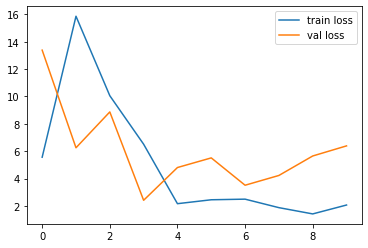

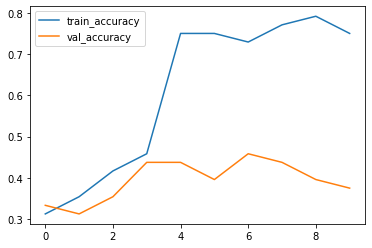

<Figure size 432x288 with 0 Axes>

In [21]:
r = model.fit_generator(training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')
plt.plot(r.history['accuracy'], label='train_accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_accuracy')

import tensorflow as tf

from keras.models import load_model

model.save('/content/drive/My Drive/Colab Notebooks/h5/face1_new_model.h5')

In [22]:
training_set.class_indices

{'disgust': 0, 'sad': 1, 'surprise': 2}

In [24]:
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.xception import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
model=load_model('/content/drive/My Drive/Colab Notebooks/h5/face1_new_model.h5')
img=image.load_img('/content/drive/My Drive/Colab Notebooks/face12/ima2/test/surprise/128.jpg',target_size=(299,299))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
classes=model.predict(img_data)
print(np.round(classes,decimals=2))


[[0. 1. 0.]]
